# K線型態哪種最有用？

## 取得價格資料、計算獲利

In [33]:
from finlab.data import Data

data = Data()
open_adj = data.get_adj('開盤價')                     #.get_adj() =>還原除權息後的股價

profit1 =  open_adj.shift(-2) / open_adj.shift(-1)    # 買入1天的報酬率
profit5 =  open_adj.shift(-6) / open_adj.shift(-1)    # 買入5天的報酬率
profit10 = open_adj.shift(-11) / open_adj.shift(-1)   # 買入10天的報酬率
profit60 = open_adj.shift(-61) / open_adj.shift(-1)   # 買入60天的報酬率

profit1 = profit1.unstack()                         # 將二維DataFrame轉換唯一維Series。
profit5 = profit5.unstack()
profit10 = profit10.unstack()
profit60 = profit60.unstack()

dd=profit1["4129"].tail(20)          # 4129 聯合
dd=dd.dropna()                       # 報酬率大於一
dd                                   # 股票4968立積 最近120天的

date
2019-07-12    1.017273
2019-07-15    0.993548
2019-07-16    0.995671
2019-07-17    1.004348
2019-07-18    0.981602
2019-07-19    1.013230
2019-07-22    0.996736
2019-07-23    1.062227
2019-07-24    1.007194
2019-07-25    0.988776
2019-07-26    1.000000
2019-07-29    0.990712
2019-07-30    0.976042
2019-07-31    1.001067
2019-08-01    0.974414
2019-08-02    0.984683
2019-08-05    1.002222
2019-08-06    0.997783
dtype: float64

## 計算K線型態

In [30]:
import talib
#dir(talib)                    # 用dir()指令 可以查出所有talib的function
df = data.talib('CDL2CROWS')   # CDL=> Candle Stick Pattern, 蠟燭型態。
                               # https://www.joinquant.com/view/community/detail/831023b906b894b40abf42b4c45d5ed8

df = df.unstack()
df = df[df!=0]                 # 將等於0結果篩選掉，發現不為零的為-100，就是符合兩隻烏鴉的型態。
df
#profit10[df < 0].mean()

      date      
0050  2011-01-04   -100
      2018-11-30   -100
0051  2008-01-11   -100
      2012-04-27   -100
      2016-06-03   -100
      2018-06-08   -100
0052  2015-07-07   -100
      2017-02-03   -100
0053  2018-07-03   -100
      2019-04-19   -100
0054  2013-12-11   -100
      2018-07-03   -100
0055  2014-05-30   -100
0056  2011-01-13   -100
0057  2017-08-15   -100
      2018-07-03   -100
0061  2013-01-16   -100
      2015-03-03   -100
0080  2010-03-19   -100
1101  2010-03-31   -100
      2010-12-03   -100
      2011-04-22   -100
      2014-07-31   -100
1102  2009-05-20   -100
1108  2009-04-23   -100
      2009-12-15   -100
1109  2016-08-29   -100
1201  2008-03-13   -100
      2016-03-16   -100
1203  2017-10-27   -100
                   ... 
9934  2008-06-03   -100
      2009-07-17   -100
      2011-10-31   -100
9935  2007-07-13   -100
      2009-07-16   -100
      2010-04-26   -100
9937  2008-05-14   -100
9939  2009-07-07   -100
9940  2010-04-30   -100
      2011-10-31   -100

## 計算每一種K線型態的獲利

In [32]:
results = {}
counts = {}
from talib import abstract

for fname in [fname for fname in dir(abstract) if fname[:3] == 'CDL']:
    df = data.talib(fname)
    df = df.unstack()                              # Series序列
    pos = df > 0                                   # positive 大於零
    neg = df < 0                                   # negotive 負的
    
    results['NEG_' + fname] = {
        'profit1': profit1 [neg].mean(),
        'profit5': profit5 [neg].mean(),
        'profit10':profit10[neg].mean(),
        'profit60':profit60[neg].mean(),
        'count': sum(neg),
    }
    results['POS_' + fname] = {
        'profit1': profit1 [pos].mean(),
        'profit5': profit5 [pos].mean(),
        'profit10':profit10[pos].mean(),
        'profit60':profit60[pos].mean(),
        'count': sum(pos),
    }
    print(fname)
    

CDL2CROWS
CDL3BLACKCROWS
CDL3INSIDE
CDL3LINESTRIKE
CDL3OUTSIDE
CDL3STARSINSOUTH
CDL3WHITESOLDIERS
CDLABANDONEDBABY
CDLADVANCEBLOCK
CDLBELTHOLD
CDLBREAKAWAY
CDLCLOSINGMARUBOZU
CDLCONCEALBABYSWALL
CDLCOUNTERATTACK
CDLDARKCLOUDCOVER
CDLDOJI
CDLDOJISTAR
CDLDRAGONFLYDOJI
CDLENGULFING
CDLEVENINGDOJISTAR
CDLEVENINGSTAR
CDLGAPSIDESIDEWHITE
CDLGRAVESTONEDOJI
CDLHAMMER
CDLHANGINGMAN
CDLHARAMI
CDLHARAMICROSS
CDLHIGHWAVE
CDLHIKKAKE
CDLHIKKAKEMOD
CDLHOMINGPIGEON
CDLIDENTICAL3CROWS
CDLINNECK
CDLINVERTEDHAMMER
CDLKICKING
CDLKICKINGBYLENGTH
CDLLADDERBOTTOM
CDLLONGLEGGEDDOJI
CDLLONGLINE
CDLMARUBOZU
CDLMATCHINGLOW
CDLMATHOLD
CDLMORNINGDOJISTAR
CDLMORNINGSTAR
CDLONNECK
CDLPIERCING
CDLRICKSHAWMAN
CDLRISEFALL3METHODS
CDLSEPARATINGLINES
CDLSHOOTINGSTAR
CDLSHORTLINE
CDLSPINNINGTOP
CDLSTALLEDPATTERN
CDLSTICKSANDWICH
CDLTAKURI
CDLTASUKIGAP
CDLTHRUSTING
CDLTRISTAR
CDLUNIQUE3RIVER
CDLUPSIDEGAP2CROWS
CDLXSIDEGAP3METHODS


## 哪一種蠟燭型態最好？

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("ggplot")
%matplotlib inline
plt.rcParams['figure.figsize'] = (15,9)

df_result = pd.DataFrame(results).transpose()     #　將result放入Dataframe中，transpose():將縱軸、橫軸做一個對調。

profit_names = ['profit1', 'profit5', 'profit10', 'profit60']
df = pd.DataFrame({name:df_result[name] for name in profit_names}).dropna()
df.sort_values('profit10')         # 根據profit10來sort排序

profit1   profit5  profit10  profit60
POS_CDLCONCEALBABYSWALL  1.000563  0.968385  0.983234  0.966951
POS_CDLABANDONEDBABY     0.995744  0.991665  0.991292  1.001807
NEG_CDLRISEFALL3METHODS  0.998308  0.988446  0.994659  1.006303
NEG_CDL3LINESTRIKE       0.997534  0.998019  0.995951  0.987136
POS_CDLTASUKIGAP         1.000672  0.994346  0.997293  1.019947
POS_CDL3LINESTRIKE       0.999056  0.998957  0.998747  1.010803
NEG_CDLIDENTICAL3CROWS   1.000445  0.999854  0.999274  1.007561
POS_CDLDOJISTAR          0.999409  1.002825  0.999295  1.024347
POS_CDLENGULFING         0.999813  0.997637  0.999468  1.030433
NEG_CDLTRISTAR           1.001166  0.999335  0.999516  1.050807
POS_CDLXSIDEGAP3METHODS  0.999778  0.998656  0.999981  1.022225
NEG_CDLKICKING           0.997786  0.995463  0.999983  1.041832
NEG_CDLHARAMI            0.999699  0.999072  1.000795  1.031958
POS_CDL3OUTSIDE          0.999397  0.997517  1.001130  1.034766
POS_CDLHAMMER            1.000080  0.999777  1.001441  1.025000
POS_CDLINVERTEDHAMMER    1.000023  1.003017  1.001638  1.026445
NEG_CDLXSIDEGAP3METHODS  0.999647  1.000727  1.001850  1.002023
POS_CDLMORNINGSTAR       0.999826  1.000980  1.002032  1.018695
POS_CDLBREAKAWAY         1.002195  1.010442  1.002038  1.010540
NEG_CDL3INSIDE           0.999567  0.999201  1.002047  1.022830
NEG_CDLONNECK            1.000969  1.001969  1.002176  1.027321
POS_CDLMORNINGDOJISTAR   1.000062  1.001170  1.002233  1.016654
POS_CDLHIKKAKE           1.000018  1.001002  1.002241  1.021333
NEG_CDLDARKCLOUDCOVER    1.001093  1.001156  1.002251  1.018805
POS_CDLPIERCING          1.000316  0.998208  1.002274  1.035312
NEG_CDLHARAMICROSS       0.999750  0.999892  1.002297  1.038600
POS_CDLCLOSINGMARUBOZU   1.000797  1.000372  1.002412  1.031472
NEG_CDLGAPSIDESIDEWHITE  1.000794  1.001006  1.002438  1.044473
NEG_CDLBREAKAWAY         0.998936  1.001393  1.002544  1.074275
POS_CDLRISEFALL3METHODS  1.002289  1.005368  1.002713  1.045855
...                           ...       ...       ...       ...
POS_CDLDOJI              1.000677  1.002588  1.004494  1.032857
POS_CDLHIGHWAVE          1.000755  1.002286  1.004529  1.024585
POS_CDLUNIQUE3RIVER      1.000364  1.003795  1.004638  1.027012
NEG_CDLHANGINGMAN        1.000922  1.002189  1.004706  1.033374
POS_CDL3INSIDE           1.001491  1.002696  1.004774  1.024974
NEG_CDLADVANCEBLOCK      1.000145  1.001427  1.005120  1.038598
POS_CDLBELTHOLD          1.000868  1.002251  1.005129  1.036181
NEG_CDLHIKKAKE           1.000690  1.002953  1.005232  1.028293
POS_CDLSHORTLINE         1.001310  1.003364  1.005293  1.039531
NEG_CDLSHOOTINGSTAR      0.999896  1.001649  1.005604  1.028415
POS_CDLGAPSIDESIDEWHITE  1.001272  1.002026  1.005958  1.051898
POS_CDLHARAMICROSS       1.001356  1.004423  1.006036  1.023680
NEG_CDLDOJISTAR          1.001171  1.002044  1.006066  1.037327
POS_CDLHOMINGPIGEON      1.001276  1.004640  1.006125  1.023159
POS_CDLHIKKAKEMOD        1.001081  1.003377  1.006297  1.024757
POS_CDLHARAMI            1.001399  1.004859  1.006426  1.023231
NEG_CDL3BLACKCROWS       1.002366  1.006180  1.006450  1.009556
NEG_CDLHIKKAKEMOD        1.001477  1.001666  1.006617  1.023724
POS_CDLKICKINGBYLENGTH   1.002466  1.007299  1.006710  1.017800
POS_CDLSEPARATINGLINES   1.001154  1.003406  1.006895  1.029617
NEG_CDLUPSIDEGAP2CROWS   1.000721  1.003018  1.006970  1.022527
NEG_CDL2CROWS            1.001859  1.005049  1.007019  1.017950
NEG_CDLCOUNTERATTACK     0.999868  1.003318  1.007718  1.039464
NEG_CDLKICKINGBYLENGTH   1.001358  1.002063  1.007938  1.063036
NEG_CDLABANDONEDBABY     0.999393  0.998977  1.008428  1.026653
POS_CDLTRISTAR           1.001194  1.002555  1.009021  1.054706
NEG_CDLEVENINGSTAR       1.001490  1.005465  1.009168  1.026762
POS_CDL3STARSINSOUTH     1.012494  1.017411  1.009641  1.069001
NEG_CDLEVENINGDOJISTAR   1.001111  1.005087  1.009734  1.030144
POS_CDLKICKING           1.005150  1.012915  1.012622  1.027616

[88 rows x 4 columns]

## 蠟燭型態歷史資料繪製

In [36]:
# 開高低收成交量
high = data.get("最高價")
low = data.get("最低價")
open_ = data.get("開盤價")
close = data.get("收盤價")
volume = data.get("成交股數")

# 找到蠟燭型態
df = data.talib("CDLTRISTAR")
signals = (df > 0) & (volume.rolling(10).mean() > 100000)
signals = signals.unstack()
signals = signals[signals > 0]
signals.index.levels[0].name = 'stock_id'
signals = signals.reset_index()

/Users/cheng-yuhan/miniconda3/envs/course2/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


open   high  close    low      volume
date                                              
2008-08-26  36.85  36.85  35.35  34.90  15598543.0
2008-08-27  33.55  35.05  34.65  33.55  20336236.0
2008-08-28  34.50  35.35  34.00  33.30  18317613.0
2008-08-29  34.40  35.20  35.10  34.10   9394993.0
2008-09-01  35.45  36.35  35.70  35.30  15915581.0
2008-09-02  36.20  36.80  36.40  35.70  10503395.0
2008-09-03  36.45  36.80  34.50  33.90  11399841.0
2008-09-04  34.00  34.50  34.00  32.95   8583092.0
2008-09-05  32.85  33.10  32.70  32.20  10983017.0
2008-09-08  34.70  34.90  34.80  33.80   8315269.0

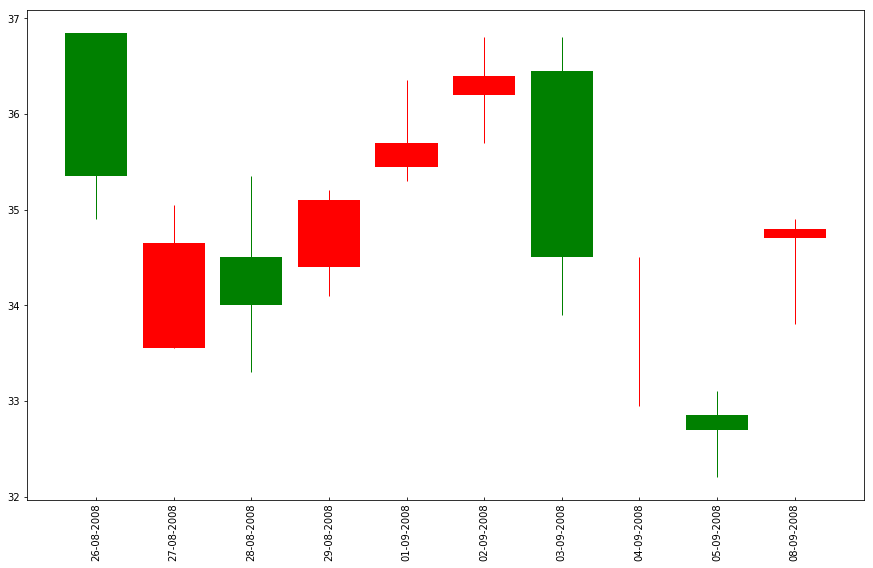

In [137]:

ind = 6
stock_id = signals['stock_id'].iloc[ind]
date = signals['date'].iloc[ind]

import matplotlib.pyplot as plt

o = open_[stock_id].loc[:date].tail(10)
h = high[stock_id].loc[:date].tail(10)
l = low[stock_id].loc[:date].tail(10)
c = close[stock_id].loc[:date].tail(10)
v = volume[stock_id].loc[:date].tail(10)

df = pd.DataFrame({'open':o, 'high':h, 'close':c, 'low':l, 'volume':v}).dropna(how='all')

from finlab.plot_candles import plot_candles
plot_candles(start_time=o.index[0], end_time=o.index[-1], pricing=df,)

df